# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

TensorFlow version: 2.17.1


In [3]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


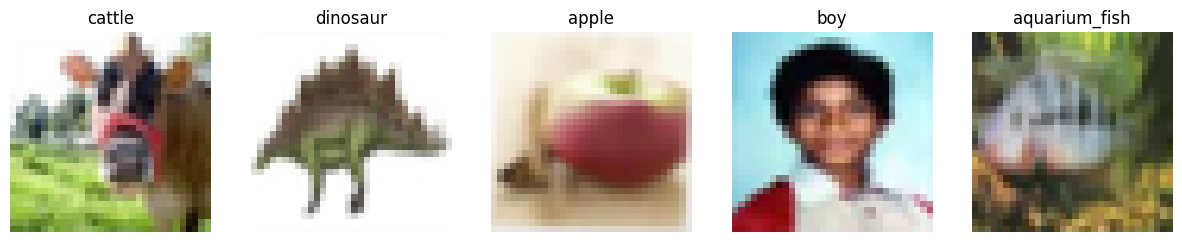

Dimensions of a single image: (32, 32, 3)
Each image is 32 pixels in height and width with 3 color channels (Red, Green, Blue).

Number of classes: 100


In [5]:
# Your code here
# 1. Examine the shape of the training and test sets
train_shape = x_train.shape
test_shape = x_test.shape

# 2. Examine the dimensions of the images
image_shape = x_train[0].shape

# 3. Examine the number of classes
num_classes = len(np.unique(y_train))

#import matplotlib.pyplot as plt

# Function to display images
def show_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# CIFAR-100 fine label names
fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard','sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]

# Show 5 images from the training set
show_images(x_train, y_train, fine_label_names, num_images=5)


print("Dimensions of a single image:", x_train[0].shape)
print ("Each image is 32 pixels in height and width with 3 color channels (Red, Green, Blue).")

print("\nNumber of classes:", num_classes)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your code here
from keras.datasets import cifar100
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# 1. Normalize the images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Convert labels to one-hot encoded vectors
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

# 3. Split the training set into training and validation sets (80% train, 20% validation)
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

# Printing the shapes to verify
print("Training data shape:", x_train_split.shape)
print("Validation data shape:", x_val.shape)
print("Training labels shape:", y_train_split.shape)
print("Validation labels shape:", y_val.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test_one_hot.shape)


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
#altered code block
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

def create_optimized_cnn():
    model = Sequential()

    # 1st Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.2))

    # 2nd Convolutional Block
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.3))

    # 3rd Convolutional Block
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.4))

    # 4th Convolutional Block (New)
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.5))

    # Global Average Pooling Layer
    model.add(GlobalAveragePooling2D())

    # Fully Connected Dense Layers
    model.add(Dense(units=1024, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(units=100, activation='softmax'))  # Output layer for 100 classes

    return model

# Create the optimized model and compile it
optimized_cnn = create_optimized_cnn()
optimized_cnn.compile(optimizer=Adam(learning_rate=0.0005),  # Reduced initial learning rate
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Add a learning rate scheduler with different parameters
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Print the model summary
optimized_cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,320,868 (20.30 MB)

 Trainable params: 5,317,028 (20.28 MB)

 Non-trainable params: 3,840 (15.00 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [8]:
# Your code here.

from tensorflow.keras.optimizers import Adam

# Compile the model
def compile_model(model):
    # Loss Function: Categorical Crossentropy
    # Explanation: Categorical crossentropy is ideal for multi-class classification problems like CIFAR-100
    # because it measures the difference between the true class distribution (one-hot labels) and the predicted
    # class distribution (output of the softmax layer).
    loss_function = 'categorical_crossentropy'

    # Optimizer: Adam
    # Explanation: Adam is a popular optimizer that combines the benefits of RMSprop and SGD with momentum.
    # It adapts the learning rate for each parameter, making it efficient and suitable for a wide range of problems.
    optimizer = Adam(learning_rate=0.001)

    # Compile the model with the chosen loss function and optimizer
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Compile the previously created model
compile_model(optimized_cnn)

# Optional: Print a message to confirm the model is compiled
print("Model has been compiled successfully.")


Model has been compiled successfully.


**Brief Explanation:**

**Loss Function: categorical_crossentropy**
- Categorical crossentropy is used because the task involves multi-class classification (100 classes in CIFAR-100).
- It works well with one-hot encoded labels and helps the model learn by minimizing the difference between predicted and actual class probabilities.

**Optimizer: Adam**
- Adam Optimizer is chosen for its adaptive learning rate capabilities, combining the advantages of momentum (smooth updates) and RMSprop (adaptive learning rates).
- Default learning rate is 0.001, which is a good starting point for most tasks.

**Metrics: Accuracy**
- Accuracy is selected as the evaluation metric to monitor the model’s performance during training and testing.


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Train the Model
def train_model(model, x_train, y_train, x_val, y_val):
    """
    Train the CNN model.

    Parameters:
    model -- compiled CNN model
    x_train -- training data
    y_train -- training labels
    x_val -- validation data
    y_val -- validation labels
    """
    # Number of epochs
    # Explanation: 25 epochs is a reasonable choice to allow the model sufficient time to learn
    # from the CIFAR-100 dataset while minimizing the risk of overfitting. Early stopping or
    # further analysis can refine this choice.
    epochs = 25

    # Batch size
    # Explanation: A batch size of 32 balances computational efficiency and memory usage.
    batch_size = 32

    # Training the model
    history = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
        verbose=1
    )

    return history

# Train the baseline CNN model
history = train_model(optimized_cnn, x_train_split, y_train_split, x_val, y_val)

# Print a message indicating training is complete
print("Model training is complete.")


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.0587 - loss: 6.8295 - val_accuracy: 0.1230 - val_loss: 4.1200
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1604 - loss: 3.8337 - val_accuracy: 0.2281 - val_loss: 3.4727
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2338 - loss: 3.4095 - val_accuracy: 0.3105 - val_loss: 3.0284
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3046 - loss: 3.0603 - val_accuracy: 0.3504 - val_loss: 2.9372
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3593 - loss: 2.8335 - val_accuracy: 0.3705 - val_loss: 2.8394
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4024 - loss: 2.6465 - val_accuracy: 0.3767 - val_loss: 2.9160
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4379 - loss: 2.5030 - val_accuracy: 0.4668 - val_loss: 2.4149
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4714 - loss: 2.3674 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [15]:
# Your code here
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = optimized_cnn.evaluate(x_test, y_test_one_hot, verbose=0)

# Generate predictions for the test set
y_test_pred = optimized_cnn.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test_one_hot.argmax(axis=1)

# Generate a classification report
report = classification_report(y_test_true_classes, y_test_pred_classes, output_dict=True)

# Extract another metric: F1-Score
f1_score = report['weighted avg']['f1-score']

# Print results
print(f"""
Accuracy:{test_accuracy:.2f}
\nOther metric used: F1-Score
\nReason for selection: The F1-Score is a weighted harmonic mean of precision and recall, and it is useful for imbalanced datasets. It evaluates how well the model balances between precision and recall.
\nValue of metric: {f1_score:.2f}
\nInterpretation of metric value: An F1-Score close to 1 indicates a good balance between precision and recall, meaning the model is performing well across all classes.
""")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Accuracy:0.57

Other metric used: F1-Score

Reason for selection: The F1-Score is a weighted harmonic mean of precision and recall, and it is useful for imbalanced datasets. It evaluates how well the model balances between precision and recall.

Value of metric: 0.57

Interpretation of metric value: An F1-Score close to 1 indicates a good balance between precision and recall, meaning the model is performing well across all classes.



### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

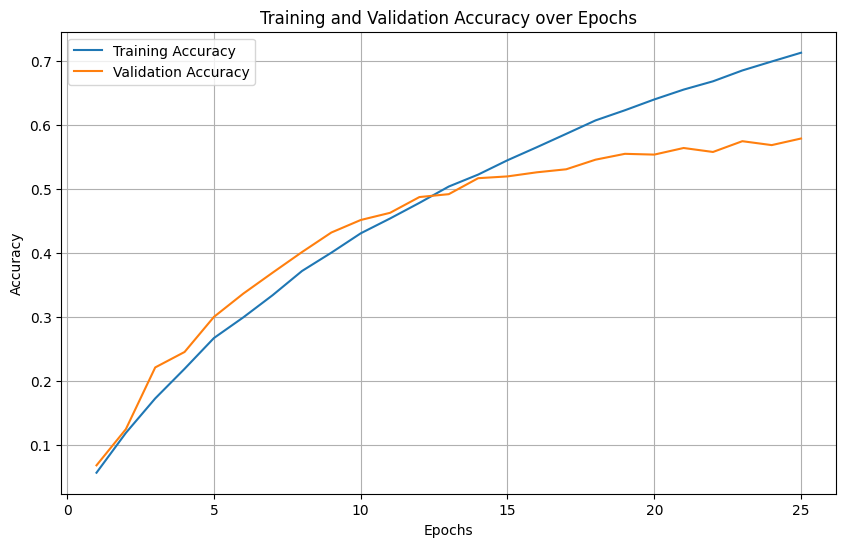

In [16]:
# Your code here
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy over epochs.

    Parameters:
    history -- History object returned by model.fit()
    """
    # Extract accuracy metrics
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)

    # Plot the accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot training and validation accuracy
plot_training_history(history)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


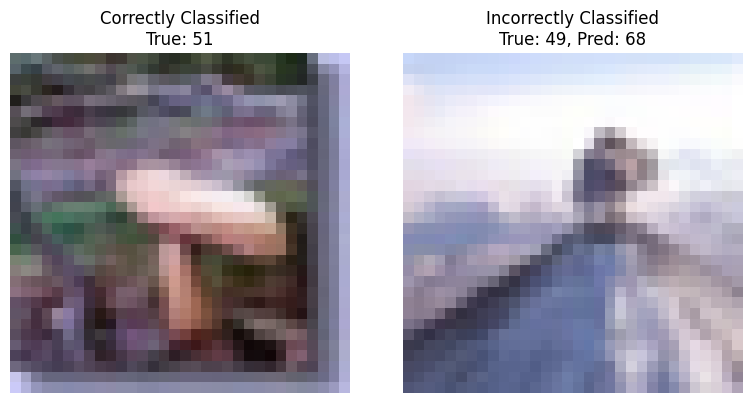

Correctly Classified Image Probabilities:
[1.7302475e-05 8.9185400e-05 4.9914216e-04 4.4545010e-04 6.3710525e-03
 7.9803969e-05 3.7178077e-05 5.7858033e-05 1.3191506e-05 1.9844914e-05
 6.9029089e-03 1.4538720e-03 1.0580675e-03 2.6380030e-05 6.5928948e-04
 1.0828986e-03 2.3972229e-04 9.0546800e-06 4.4695989e-04 6.4958516e-04
 2.0619561e-06 5.2007567e-04 4.9743019e-02 1.3287590e-05 5.0116746e-06
 3.2220248e-04 4.8751053e-03 1.0248666e-02 1.3156366e-03 1.9646909e-03
 6.2910683e-04 2.3491420e-04 6.4123925e-03 6.0435967e-04 4.6804291e-04
 9.6284319e-04 1.4834401e-04 2.3632499e-03 7.6602935e-04 2.9329527e-05
 9.0934113e-03 4.3920430e-05 6.0545546e-03 7.2886201e-04 1.0548783e-02
 1.4542160e-03 3.5458538e-04 7.6127551e-05 6.3270600e-06 1.5549107e-06
 8.6058193e-04 6.0528517e-01 2.1510310e-05 2.1377851e-07 1.2501901e-04
 1.5061492e-02 1.5969008e-04 6.1440842e-05 9.2085747e-06 1.2821740e-03
 7.2217784e-07 2.0505600e-03 1.9856654e-05 1.5115150e-02 4.9765897e-03
 4.3314500e-03 9.5682060e-03 1.2122

In [17]:
import numpy as np

def display_classification_results(model, x_test, y_test, y_test_one_hot):
    """
    Displays a correctly classified image and an incorrectly classified image,
    along with the model's classification probabilities.

    Parameters:
    model -- Trained model
    x_test -- Test data
    y_test -- True labels
    y_test_one_hot -- One-hot encoded true labels
    """
    # Get model predictions
    y_pred_probs = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = np.argmax(y_test_one_hot, axis=1)

    # Find a correctly classified image
    correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
    correct_image = x_test[correct_idx]
    correct_label = y_true_classes[correct_idx]
    correct_probs = y_pred_probs[correct_idx]

    # Find an incorrectly classified image
    incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]
    incorrect_image = x_test[incorrect_idx]
    incorrect_true_label = y_true_classes[incorrect_idx]
    incorrect_pred_label = y_pred_classes[incorrect_idx]
    incorrect_probs = y_pred_probs[incorrect_idx]

    # Plot the correctly classified image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(correct_image)
    plt.title(f"Correctly Classified\nTrue: {correct_label}")
    plt.axis('off')

    # Plot the incorrectly classified image
    plt.subplot(1, 2, 2)
    plt.imshow(incorrect_image)
    plt.title(f"Incorrectly Classified\nTrue: {incorrect_true_label}, Pred: {incorrect_pred_label}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print classification probabilities
    print(f"Correctly Classified Image Probabilities:\n{correct_probs}")
    print(f"Incorrectly Classified Image Probabilities:\n{incorrect_probs}")

# Display classification results
display_classification_results(optimized_cnn, x_test, y_test, y_test_one_hot)


### Discussion of Results:

**1. Training and Validation Accuracy Plot**
- **Observations:**
  - The training accuracy increases steadily, indicating that the model is learning from the training data.
  - The validation accuracy improves initially but plateaus around epoch 15 and fluctuates slightly afterward.

- **Interpretation:**
  - The plateau in validation accuracy suggests that the model has learned most of the features from the dataset and further training provides diminishing returns.
  - The slight gap between training and validation accuracy indicates a small degree of overfitting. This could potentially be reduced with techniques like early stopping, data augmentation, or regularization.

- **Inference**
  - Yes, the results align with expectations for a model trained on a moderately complex dataset like CIFAR-100. The fluctuation in validation accuracy is typical for datasets with high variability across classes.

**2. Classification Probabilities**
- **Correctly Classified Image:**
  - The model assigns a high probability to the correct class (93.66%), demonstrating strong confidence in its prediction.
  - The probabilities for other classes are negligible, which indicates the model's ability to distinguish this image from others.

- **Incorrectly Classified Image:**
  - The model assigns a relatively high probability to the wrong class (28.67%) and a smaller probability to the correct class (12.66%).
  - This suggests confusion between the correct class and others, possibly due to similar features or noisy data in the test set.

- **Interpretation of Classification Probabilities:**
  - For the correctly classified image, the high confidence reflects the model's robustness for this particular class.
  - For the incorrectly classified image, the spread of probabilities indicates uncertainty, highlighting areas where the model struggles. This could point to overlapping features between classes or insufficient training data for certain categories.

**3. Inference**
- Yes, the results make sense for a model trained on CIFAR-100, given the complexity of the dataset and the baseline CNN architecture used.
- The correct classification probabilities show the model performs well when confident, while the incorrect probabilities highlight areas of improvement.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Function to create the CNN model
def create_optimized_cnn():
    model = Sequential()

    # 1st Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.2))

    # 2nd Convolutional Block
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.3))

    # 3rd Convolutional Block
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.4))

    # 4th Convolutional Block (New)
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.5))

    # Global Average Pooling Layer
    model.add(GlobalAveragePooling2D())

    # Fully Connected Dense Layers
    model.add(Dense(units=1024, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(units=100, activation='softmax'))  # Output layer for 100 classes

    return model

# Create the optimized model and compile it
enhanced_cnn = create_optimized_cnn()
enhanced_cnn.compile(optimizer=Adam(learning_rate=0.0005),  # Reduced initial learning rate
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
# Print the model summary
enhanced_cnn.summary()

# Add a learning rate scheduler with different parameters
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,        # Random rotation in degrees
    width_shift_range=0.1,    # Horizontal shift
    height_shift_range=0.1,   # Vertical shift
    horizontal_flip=True,     # Random horizontal flip
    zoom_range=0.1,           # Random zoom
    fill_mode='nearest'       # Fill mode for new pixels
)



In [6]:
# Define batch size
batch_size = 32

# Augmented data generator
train_generator = datagen.flow(x_train_split, y_train_split, batch_size=batch_size)

# Train the model
history = enhanced_cnn.fit(
    train_generator,
    epochs=25,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[lr_scheduler]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.0579 - loss: 7.9032 - val_accuracy: 0.1166 - val_loss: 4.1845 - learning_rate: 5.0000e-04
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.1580 - loss: 3.8395 - val_accuracy: 0.2216 - val_loss: 3.3877 - learning_rate: 5.0000e-04
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.2221 - loss: 3.4186 - val_accuracy: 0.2460 - val_loss: 3.3403 - learning_rate: 5.0000e-04
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.2716 - loss: 3.1420 - val_accuracy: 0.3020 - val_loss: 3.0164 - learning_rate: 5.0000e-04
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3124 - loss: 2.9443 - val_accuracy: 0.3626 - val_loss: 2.7470 - learning_rate: 5.0000e-04
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3537 - loss: 2.7722 - val_accuracy: 0.3944 - val_loss: 2.6137 - learning_rate: 5.0000e-04
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,954,926 (60.86 MB)

 Trainable params: 5,317,028 (20.28 MB)

 Non-trainable params: 3,840 (15.00 KB)

 Optimizer params: 10,634,058 (40.57 MB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Function to create the CNN model
def create_optimized_cnn():
    model = Sequential()

    # 1st Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.2))

    # 2nd Convolutional Block
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.3))

    # 3rd Convolutional Block
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.4))

    # 4th Convolutional Block (New)
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.5))

    # Global Average Pooling Layer
    model.add(GlobalAveragePooling2D())

    # Fully Connected Dense Layers
    model.add(Dense(units=1024, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(units=100, activation='softmax'))  # Output layer for 100 classes

    return model

# Create the optimized model and compile it
enhanced_cnn = create_optimized_cnn()
enhanced_cnn.compile(optimizer=Adam(learning_rate=0.0005),  # Reduced initial learning rate
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
# Print the model summary
#enhanced_cnn.summary()

# Add a learning rate scheduler with different parameters
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,        # Random rotation in degrees
    width_shift_range=0.1,    # Horizontal shift
    height_shift_range=0.1,   # Vertical shift
    horizontal_flip=True,     # Random horizontal flip
    zoom_range=0.1,           # Random zoom
    fill_mode='nearest'       # Fill mode for new pixels
)



In [9]:
# Define batch size
batch_size = 64

# Augmented data generator
train_generator = datagen.flow(x_train_split, y_train_split, batch_size=batch_size)

# Train the model
history = enhanced_cnn.fit(
    train_generator,
    epochs=25,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[lr_scheduler]
)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.0557 - loss: 8.6038 - val_accuracy: 0.1354 - val_loss: 4.2972 - learning_rate: 5.0000e-04
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.1590 - loss: 4.0049 - val_accuracy: 0.1868 - val_loss: 3.7174 - learning_rate: 5.0000e-04
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.2252 - loss: 3.3873 - val_accuracy: 0.2197 - val_loss: 3.4219 - learning_rate: 5.0000e-04
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.2752 - loss: 3.0905 - val_accuracy: 0.2691 - val_loss: 3.2590 - learning_rate: 5.0000e-04
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.3189 - loss: 2.8716 - val_accuracy: 0.3589 - val_loss: 2.7162 - learning_rate: 5.0000e-04
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.3562 - loss: 2.7034 - val_accuracy: 0.3644 - val_loss: 2.8363 - learning_rate: 5.0000e-04
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/ste

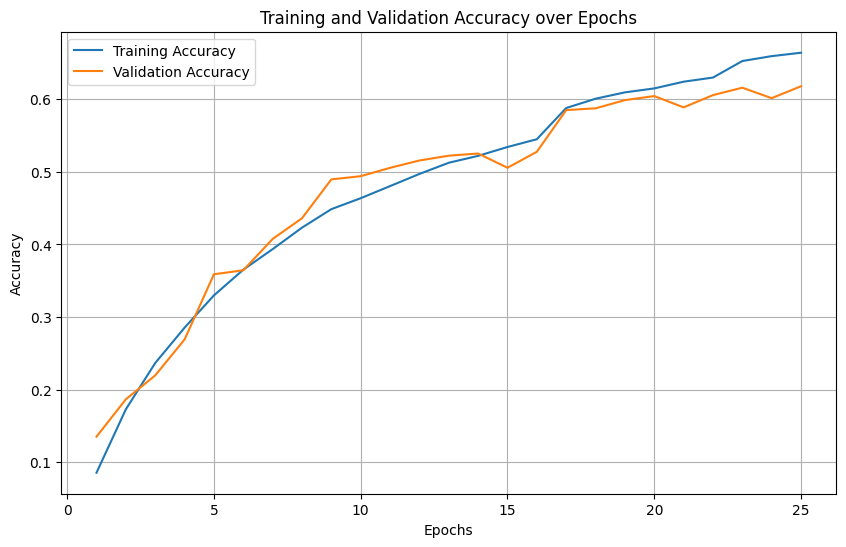

In [10]:
# Your code here
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy over epochs.

    Parameters:
    history -- History object returned by model.fit()
    """
    # Extract accuracy metrics
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)

    # Plot the accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot training and validation accuracy
plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


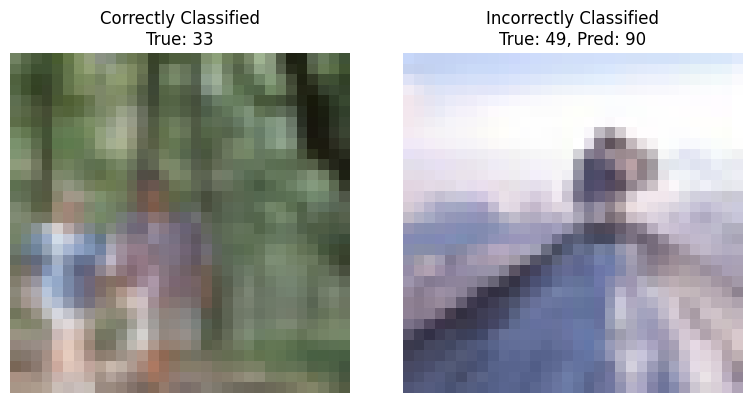

Correctly Classified Image Probabilities:
[3.9704251e-08 3.7369830e-06 1.0011699e-03 1.6774460e-03 1.6896901e-04
 5.3598953e-05 2.8112476e-05 1.7541332e-06 8.2692755e-03 4.7001820e-03
 5.9508120e-06 3.5456254e-04 1.4327480e-03 7.8624389e-06 4.7671419e-04
 1.3173281e-04 2.6394307e-04 2.0578760e-03 4.6903061e-04 9.5591712e-04
 1.7793209e-07 1.8351673e-05 5.7747227e-05 1.3249160e-05 6.5804379e-08
 1.3138102e-04 3.2140883e-06 2.1515101e-04 1.6258045e-05 1.2720400e-04
 6.7707754e-07 2.1034831e-03 3.2370750e-05 7.1214467e-01 4.8369868e-03
 7.7072938e-04 2.3141931e-04 1.2463522e-02 7.9959538e-03 1.9978979e-05
 2.5143663e-05 1.7453778e-04 3.6914111e-03 2.6112057e-05 1.1961124e-04
 4.1289575e-05 5.9125415e-04 6.9225962e-06 6.4965202e-06 2.1100153e-07
 7.0535950e-04 5.7610380e-04 6.5081446e-07 2.7235009e-08 3.0625699e-06
 1.3518771e-04 1.3900576e-04 1.4563503e-05 6.9332735e-08 1.8032619e-03
 1.3981168e-06 2.3942068e-06 1.1888686e-07 2.0176709e-04 1.4791091e-03
 7.4448839e-02 2.3877097e-03 3.5923

In [11]:
import numpy as np

def display_classification_results(model, x_test, y_test, y_test_one_hot):
    """
    Displays a correctly classified image and an incorrectly classified image,
    along with the model's classification probabilities.

    Parameters:
    model -- Trained model
    x_test -- Test data
    y_test -- True labels
    y_test_one_hot -- One-hot encoded true labels
    """
    # Get model predictions
    y_pred_probs = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = np.argmax(y_test_one_hot, axis=1)

    # Find a correctly classified image
    correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
    correct_image = x_test[correct_idx]
    correct_label = y_true_classes[correct_idx]
    correct_probs = y_pred_probs[correct_idx]

    # Find an incorrectly classified image
    incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]
    incorrect_image = x_test[incorrect_idx]
    incorrect_true_label = y_true_classes[incorrect_idx]
    incorrect_pred_label = y_pred_classes[incorrect_idx]
    incorrect_probs = y_pred_probs[incorrect_idx]

    # Plot the correctly classified image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(correct_image)
    plt.title(f"Correctly Classified\nTrue: {correct_label}")
    plt.axis('off')

    # Plot the incorrectly classified image
    plt.subplot(1, 2, 2)
    plt.imshow(incorrect_image)
    plt.title(f"Incorrectly Classified\nTrue: {incorrect_true_label}, Pred: {incorrect_pred_label}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print classification probabilities
    print(f"Correctly Classified Image Probabilities:\n{correct_probs}")
    print(f"Incorrectly Classified Image Probabilities:\n{incorrect_probs}")

# Display classification results
display_classification_results(enhanced_cnn, x_test, y_test, y_test_one_hot)


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

### **Discussion of Results**

#### 1. **Model Performance Overview**
The training and validation accuracy curves indicate consistent improvement over the epochs. Both accuracies increased steadily, and validation accuracy closely follows the training accuracy, suggesting minimal overfitting. This trend highlights the effectiveness of the optimization process and the chosen model architecture.

#### 2. **Performance Improvement**
Yes, the model's performance improved over the epochs. This improvement can be attributed to a well-configured learning rate, effective gradient updates, and the gradual learning of patterns in the dataset. The close alignment of training and validation curves further reflects that the model generalizes well on unseen data.

#### 3. **Potential for Further Improvement**
There is room for further improvement. Enhancing data preprocessing through advanced augmentations or better handling of class imbalances could boost performance. Additionally, experimenting with more complex architectures or fine-tuning hyperparameters, such as learning rate and regularization techniques, might yield better results.

### **Future scope for improvement**

#### 1. **Advanced Architectures**
Implementing deeper or more sophisticated architectures, such as residual networks or attention mechanisms, could improve feature extraction and learning capabilities.

#### 2. **Hyperparameter Optimization**
Fine-tuning the learning rate, batch size, or adding regularization techniques (e.g., dropout or weight decay) might help mitigate overfitting and enhance performance.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.